In [1]:
%load_ext autoreload
%autoreload 2

import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import PyLasMech as plm

### Read well log datas

In [2]:
csvFiles=plm.FileFinder("../Data/Drilling",fext=".csv")
WellNames=[os.path.split(os.path.split(path)[0])[1] for path in csvFiles]
print("WellNames=",WellNames)

[IO] Found 5 log files


,FileName,Location
0,15_9-F-12_testpoints.csv,..\Data\Drilling\15_9-F-12\15_9-F-12_testpoint...
1,15_9-F-14_testpoints.csv,..\Data\Drilling\15_9-F-14\15_9-F-14_testpoint...
2,15_9-F-15C_testpoints.csv,..\Data\Drilling\15_9-F-15C\15_9-F-15C_testpoi...
3,15_9-F-4_testpoints.csv,..\Data\Drilling\15_9-F-4\15_9-F-4_testpoints.csv
4,15_9-F-5_test_point.csv,..\Data\Drilling\15_9-F-5\15_9-F-5_test_point.csv


WellNames= ['15_9-F-12', '15_9-F-14', '15_9-F-15C', '15_9-F-4', '15_9-F-5']


In [4]:
for i,csv in enumerate(csvFiles):
    print("Well",WellNames[i])
    print("Reading csv file @",csv)
    df = pd.read_csv(csv, header=[0, 1])
    
    MD=df.filter(like="MD")
    MD_unit=MD.columns.get_level_values(1).values[0]
    TVD=df.filter(like="TVD")
    TVD_unit=TVD.columns.get_level_values(1).values[0]
    assert len(MD.columns)==1, "Multiple MD columns found!"
    assert len(TVD.columns)==1, "Multiple TVD columns found!"
    
    #print(MD.head(),MD_unit)
    #print(TVD.head(),TVD_unit)
    las=plm.createLas(WellNames[i],["DEPT","DVER"],[MD.values.flatten(),TVD.values.flatten()],[MD_unit,TVD_unit])
    
    fpath=os.path.dirname(csv)
    fname=WellNames[i]+"_log.las"
    fname=os.path.join(fpath,fname)
    with open(fname, mode="w") as f: # Write LAS file to disk
        las.write(f,STEP=10)
    print("Write Las file @",fname)

Well 15_9-F-12
Reading csv file @ F:\Course\PETE 4241\Projects\Data\Drilling\15_9-F-12\15_9-F-12_testpoints.csv
Write Las file @ F:\Course\PETE 4241\Projects\Data\Drilling\15_9-F-12\15_9-F-12_log.las
Well 15_9-F-14
Reading csv file @ F:\Course\PETE 4241\Projects\Data\Drilling\15_9-F-14\15_9-F-14_testpoints.csv
Write Las file @ F:\Course\PETE 4241\Projects\Data\Drilling\15_9-F-14\15_9-F-14_log.las
Well 15_9-F-15C
Reading csv file @ F:\Course\PETE 4241\Projects\Data\Drilling\15_9-F-15C\15_9-F-15C_testpoints.csv
Write Las file @ F:\Course\PETE 4241\Projects\Data\Drilling\15_9-F-15C\15_9-F-15C_log.las
Well 15_9-F-4
Reading csv file @ F:\Course\PETE 4241\Projects\Data\Drilling\15_9-F-4\15_9-F-4_testpoints.csv
Write Las file @ F:\Course\PETE 4241\Projects\Data\Drilling\15_9-F-4\15_9-F-4_log.las
Well 15_9-F-5
Reading csv file @ F:\Course\PETE 4241\Projects\Data\Drilling\15_9-F-5\15_9-F-5_test_point.csv
Write Las file @ F:\Course\PETE 4241\Projects\Data\Drilling\15_9-F-5\15_9-F-5_log.las


### Plot well log curves

In [5]:
LogFiles=plm.FileFinder("../Data/Drilling",fext=".las")

[IO] Found 9 log files


,FileName,Location
0,15_9-F-11B_MUD_LOG.las,..\Data\Drilling\15_9-F-11B\15_9-F-11B_MUD_LOG...
1,15_9-F-12_log.las,..\Data\Drilling\15_9-F-12\15_9-F-12_log.las
2,15_9-F-14_log.las,..\Data\Drilling\15_9-F-14\15_9-F-14_log.las
3,15_9-F-15C_log.las,..\Data\Drilling\15_9-F-15C\15_9-F-15C_log.las
4,15_9-F-15D_MUD_LOG.las,..\Data\Drilling\15_9-F-15D\15_9-F-15D_MUD_LOG...
5,15_9-F-1B_MUD_LOG.las,..\Data\Drilling\15_9-F-1B\15_9-F-1B_MUD_LOG.las
6,15_9-F-1C_MUD_LOG.las,..\Data\Drilling\15_9-F-1C\15_9-F-1C_MUD_LOG.las
7,15_9-F-4_log.las,..\Data\Drilling\15_9-F-4\15_9-F-4_log.las
8,15_9-F-5_log.las,..\Data\Drilling\15_9-F-5\15_9-F-5_log.las


[IO] Reading F:\Course\PETE 4241\Projects\Data\Drilling\15_9-F-14\15_9-F-14_log.las.....
[Warnning] Data size (359,92) is in-comptabile with depth/depth_step!
Done!
	Auto Depth Range= (145.9, 3729.86) for  ['DEPT', 'DVER']


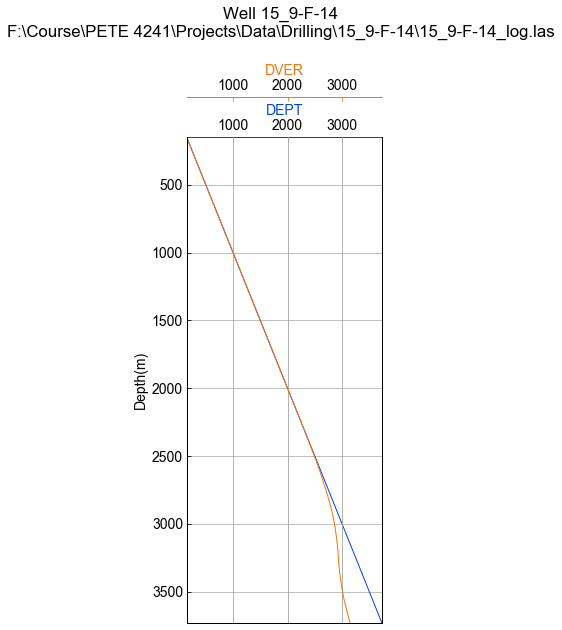

In [6]:
WellLog=plm.ReadLas(LogFiles[2])

#Plot logs with auto depth range
MD_range=WellLog.plm_param.MinMaxVal[0]
TVD_range=WellLog.plm_param.MinMaxVal[1]
Common_range=[min(MD_range+TVD_range),max(MD_range+TVD_range)]
Xlim={"DEPT":Common_range,"DVER":Common_range}
fig=plm.plotLogs(LogData=WellLog,CurveNames=["DEPT","DVER"],XLims=Xlim)